In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the training data from CSV
train_df = pd.read_csv('../data/mnist_train.csv')

# Separate features and labels
X_train_flat = train_df.drop('label', axis=1).values  # All columns except 'label'
y_train = train_df['label'].values  # 'label' column

# Load the test data from CSV
test_df = pd.read_csv('../data/mnist_test.csv')

# Separate features and labels
X_test_flat = test_df.drop('label', axis=1).values  # All columns except 'label'
y_test = test_df['label'].values  # 'label' column

# Reshape the images back to 28x28
X_train = X_train_flat.reshape(X_train_flat.shape[0], 28, 28)
X_test = X_test_flat.reshape(X_test_flat.shape[0], 28, 28)


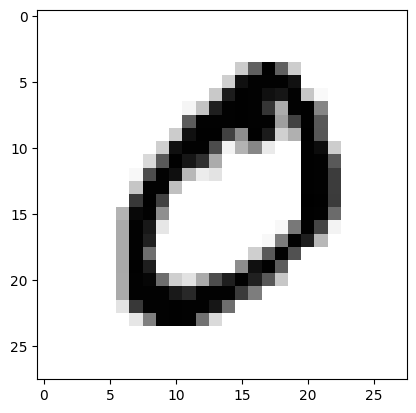

In [9]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [10]:
print(f"The images present in the Training Dataset are: {len(X_train)}, and the images present in the Testing Dataset are: {len(X_test)}")
print(f"The shape of  images are: {X_train[0].shape}")

The images present in the Training Dataset are: 60000, and the images present in the Testing Dataset are: 10000
The shape of  images are: (28, 28)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf




In [14]:
# Load the trained model
model = tf.keras.models.load_model('../models/model.h5')  # Adjust the path as necessary


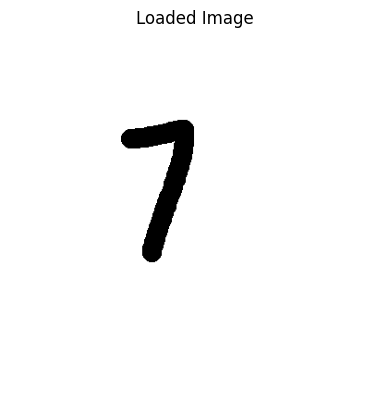

In [20]:

# Load the drawn digit image
img_path = '../data/digit.png'  # Adjust the filename if necessary
img = Image.open(img_path).convert("L")  # Load the image in grayscale

# Display the loaded image
plt.imshow(img, cmap='gray')
plt.title("Loaded Image")
plt.axis('off')
plt.show()



In [21]:
# Preprocess the image
img_resized = img.resize((28, 28))  # Resize to 28x28
img_inverted = np.invert(np.array(img_resized))  # Invert colors (black to white and vice versa)
img_normalized = img_inverted / 255.0  # Normalize to [0, 1]



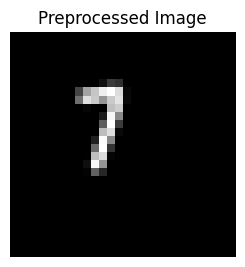

In [22]:
# Display the preprocessed image (use the normalized image)
plt.subplot(1, 2, 2)
plt.imshow(img_normalized, cmap='gray')  # Use img_normalized for visualization
plt.title("Preprocessed Image")
plt.axis('off')

plt.show()



In [23]:
# Load the trained model
# model = tf.keras.models.load_model('../models/model.h5')  # Adjust the path as necessary
# Prepare for prediction
img_reshaped = img_normalized.reshape(1, 28, 28, 1)  # Reshape for model input

# Predict the digit
predictions = model.predict(img_reshaped)
predicted_digit = np.argmax(predictions[0])

# Show the prediction
print(predictions[0])
print(f"Predicted Digit: {predicted_digit}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1.4957812e-05 3.2306921e-01 3.5264157e-02 2.9824795e-02 2.7479478e-05
 4.5396435e-05 6.3303321e-07 6.1163777e-01 1.0572067e-05 1.0502072e-04]
Predicted Digit: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction probabilities: [1.4957812e-05 3.2306921e-01 3.5264157e-02 2.9824795e-02 2.7479478e-05
 4.5396435e-05 6.3303321e-07 6.1163777e-01 1.0572067e-05 1.0502072e-04]
Predicted Digit: 7


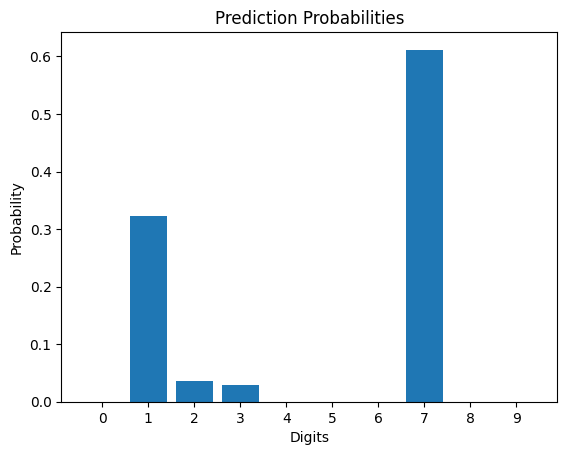

In [24]:
# Assuming img_reshaped is already prepared
predictions = model.predict(img_reshaped)

# Print the prediction probabilities
print("Prediction probabilities:", predictions[0])

# Get the predicted digit
predicted_digit = np.argmax(predictions[0])
print(f"Predicted Digit: {predicted_digit}")

# Optionally visualize the prediction as a bar chart
import matplotlib.pyplot as plt

plt.bar(range(10), predictions[0])
plt.xlabel('Digits')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.xticks(range(10))
plt.show()
